In [1]:
import pandas as pd
import numpy
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4.8
import math
from sklearn.preprocessing import MinMaxScaler
#15, 6

In [2]:
filedata= 'C:/Users/C00310965/Documents/livros/source/train_test_lago_sul_20160907_20160930.csv'
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
#dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y %H:%M')
#data = pd.read_csv('C:/Users/C00310965/Documents/livros/source/train_test_lago_sul_20160907_20160930.csv',sep=',', parse_dates=['date'],index_col='date',date_parser=dateparse)
#data = pd.read_csv('C:/Users/C00310965/Documents/livros/source/train_test_lago_sul_20160907_20160930.csv',sep=',', parse_dates=['date'],date_parser=dateparse)
dataframe = pd.read_csv(filedata, usecols=[2], engine='python', sep=',')

In [3]:
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.674682)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(477, 230)


In [6]:
test

array([[ 0.34021953],
       [ 0.35054874],
       [ 0.28147194],
       [ 0.22272435],
       [ 0.19173661],
       [ 0.10393803],
       [ 0.058102  ],
       [ 0.07746934],
       [ 0.06262105],
       [ 0.04131699],
       [ 0.02259522],
       [ 0.04325371],
       [ 0.08844416],
       [ 0.1949645 ],
       [ 0.34861204],
       [ 0.50225955],
       [ 0.66236281],
       [ 0.66559076],
       [ 0.69916081],
       [ 0.70432544],
       [ 0.63460302],
       [ 0.53905749],
       [ 0.62233704],
       [ 0.6617173 ],
       [ 0.66365403],
       [ 0.73660433],
       [ 0.95674634],
       [ 0.90316337],
       [ 0.81923825],
       [ 0.74176896],
       [ 0.70303422],
       [ 0.66752744],
       [ 0.66946423],
       [ 0.7533893 ],
       [ 0.75984508],
       [ 0.71078116],
       [ 0.70949006],
       [ 0.75855398],
       [ 0.76759201],
       [ 0.79535192],
       [ 0.67656559],
       [ 0.6849581 ],
       [ 0.80438995],
       [ 0.75726277],
       [ 0.59005815],
       [ 0

In [31]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=48)
    rolstd = pd.rolling_std(timeseries, window=48)

    #Plot rolling statistics:
    orig = timeseries.plot(color='blue',label='Original',use_index=False)
    mean = rolmean.plot(color='red', label='Rolling Mean',use_index=False)
    std = rolstd.plot(color='black', label = 'Rolling Std',use_index=False)    
    #orig = plt.plot(timeseries, color='blue',label='Original')
    #mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    #std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

In [34]:
#test_stationarity(ts)
train

array([[ 0.30794063],
       [ 0.22143319],
       [ 0.22530666],
       [ 0.14073597],
       [ 0.09167206],
       [ 0.06907683],
       [ 0.04389929],
       [ 0.01355713],
       [ 0.02130407],
       [ 0.02194965],
       [ 0.        ],
       [ 0.06455778],
       [ 0.06972241],
       [ 0.1310523 ],
       [ 0.26404133],
       [ 0.41446096],
       [ 0.53066498],
       [ 0.46998069],
       [ 0.5242092 ],
       [ 0.5416398 ],
       [ 0.59393162],
       [ 0.66429961],
       [ 0.71142679],
       [ 0.61007106],
       [ 0.61071658],
       [ 0.71852809],
       [ 0.83925122],
       [ 0.75597161],
       [ 0.7520982 ],
       [ 0.66429961],
       [ 0.61071658],
       [ 0.54938674],
       [ 0.56875408],
       [ 0.59005815],
       [ 0.6920594 ],
       [ 0.72756624],
       [ 0.59780508],
       [ 0.76952875],
       [ 0.79857981],
       [ 0.69980633],
       [ 0.68043905],
       [ 0.55584252],
       [ 0.60813427],
       [ 0.60038733],
       [ 0.58489352],
       [ 0

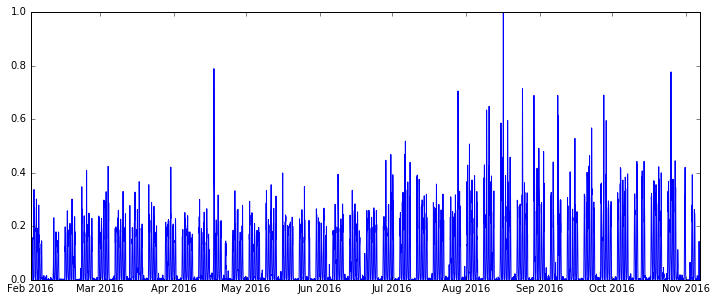

In [128]:
ds_log = ts#np.log(ts)
#ds_log = ts
ds_log.dropna(inplace=True)
plt.plot(ds_log)

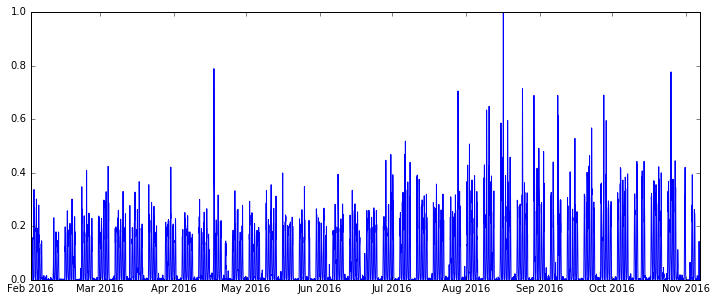

In [129]:
ds_log_diff = ds_log #- ds_log.shift()
plt.plot(ds_log_diff)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=48,center=False).mean()
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=48,center=False).std()


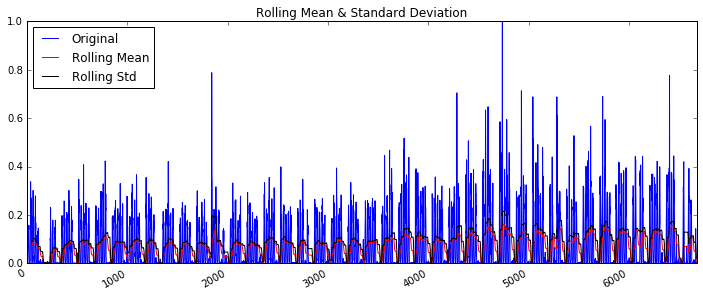

Results of Dickey-Fuller Test:
Test Statistic                -1.085684e+01
p-value                        1.480273e-19
#Lags Used                     3.500000e+01
Number of Observations Used    6.643000e+03
Critical Value (5%)           -2.861975e+00
Critical Value (1%)           -3.431335e+00
Critical Value (10%)          -2.567002e+00
dtype: float64


In [130]:
ds_log_diff.dropna(inplace=True)
test_stationarity(ds_log_diff)

In [131]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [132]:
lag_acf = acf(ds_log_diff, nlags=20)
lag_pacf = pacf(ds_log_diff, nlags=20, method='ols')

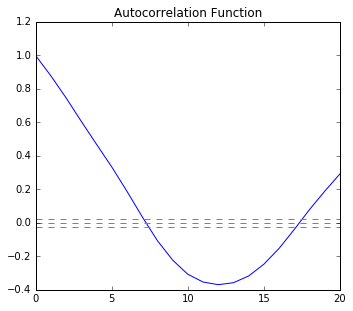

In [133]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ds_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ds_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

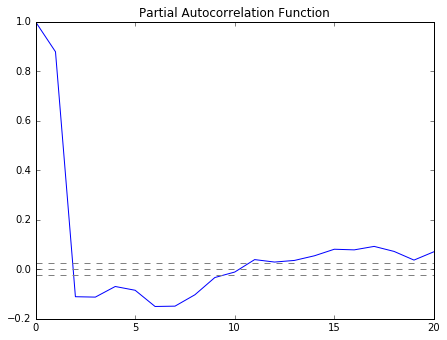

In [134]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ds_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ds_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

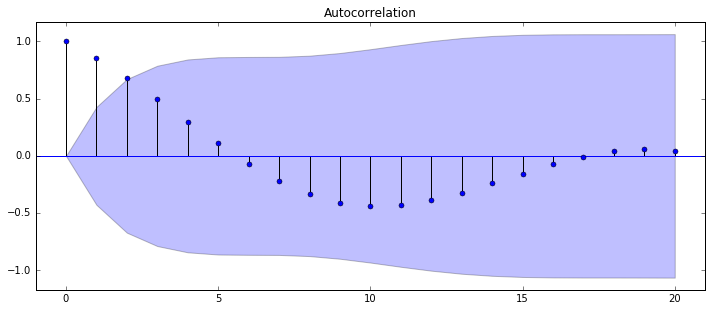

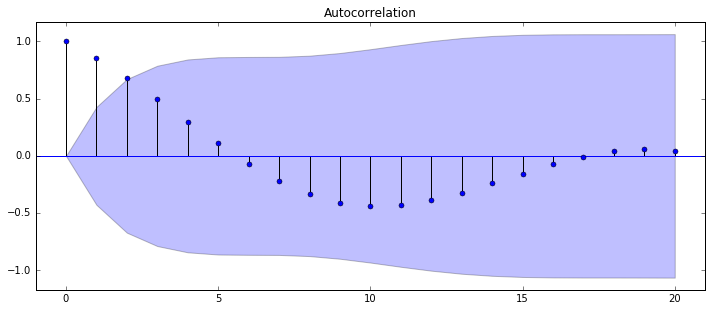

In [135]:
from statsmodels.graphics import tsaplots
tsaplots.plot_acf(lag_acf)
#label('Autocorrelation Function')

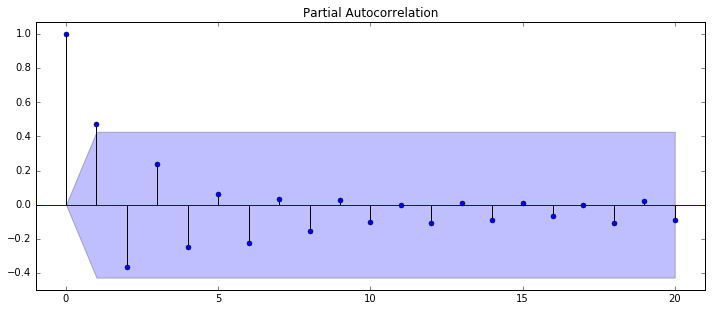

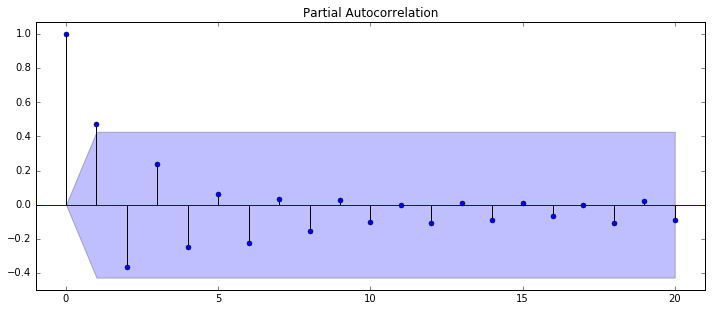

In [136]:
tsaplots.plot_pacf(lag_pacf)
#label('Partial Autocorrelation Function')

In [137]:
from statsmodels.tsa.arima_model import ARIMA


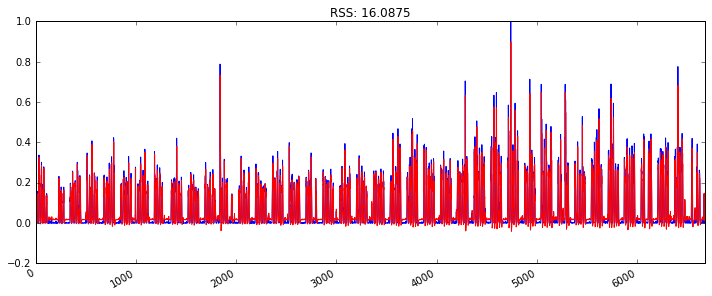

In [138]:
model = ARIMA(ds_log, order=(4, 0, 1))
results_ARIMA = model.fit(disp=-1)  
ds_log_diff.plot(use_index=False)
results_ARIMA.fittedvalues.plot(color='red',use_index=False)
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ds_log_diff)**2))
#results_ARIMA.plot_predict(468, 600, dynamic=True, plot_insample=False).plot

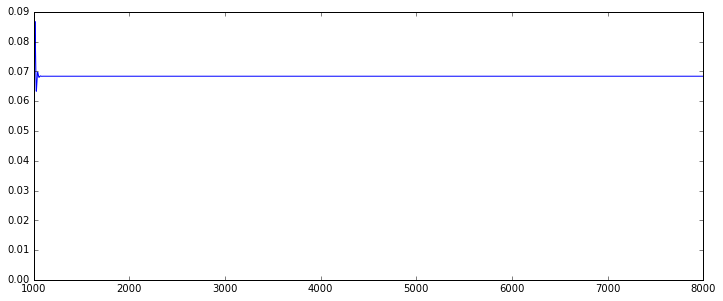

In [143]:
#results_ARIMA.predict(start='2016-09-22 00:00:00', end='2016-09-22 23:00:00', exog=None, dynamic=False).plot()
results_ARIMA.predict(start=1000, end=8000, exog=None, dynamic=True).plot()
#forecast = results_ARIMA.forecast(steps=300, exog=None, alpha=0.05)[0].tolist()
#results_ARIMA.forecast(steps=48, exog=None, alpha=0.05)[0].tolist()
#plt.plot(forecast)

In [40]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

date
2016-09-12 00:30:00    0.000360
2016-09-12 01:00:00   -0.019058
2016-09-12 01:30:00   -0.014906
2016-09-12 02:00:00   -0.014536
2016-09-12 02:30:00   -0.024206
dtype: float64


In [153]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

date
2016-09-12 00:30:00    0.001045
2016-09-12 01:00:00   -0.018820
2016-09-12 01:30:00   -0.014230
2016-09-12 02:00:00   -0.013852
2016-09-12 02:30:00   -0.021658
dtype: float64


In [175]:
predictions_ARIMA_log = pd.Series(ds_log.ix[0], index=ds_log.index)
#predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

date
2016-09-12 00:00:00    0.307941
2016-09-12 00:30:00    0.307941
2016-09-12 01:00:00    0.307941
2016-09-12 01:30:00    0.307941
2016-09-12 02:00:00    0.307941
dtype: float64

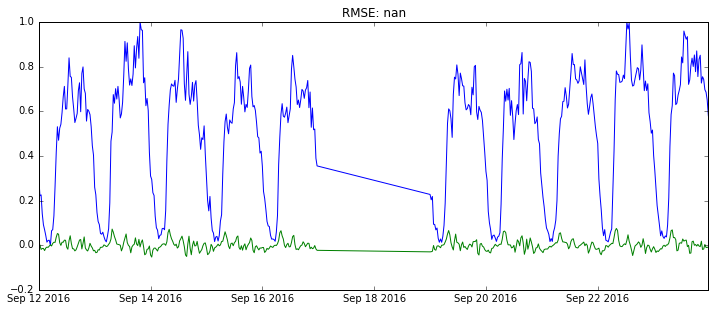

In [41]:
#predictions_ARIMA = predictions_ARIMA_log#np.exp(predictions_ARIMA_log)
predictions_ARIMA = predictions_ARIMA_diff#np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [179]:
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y %H:%M')
data = pd.read_csv('C:/Users/C00310965/Documents/livros/source/test_lago_sul_20160907_20160930.csv',sep=';', parse_dates=['date'],index_col='date',date_parser=dateparse)
print data.head()
print '\n Data Types:'
print data.dtypes

                                     node  data_hsdpa  hsdpa_users  thp_hsdpa  \
date                                                                            
2016-09-26 00:00:00  DF-BRASILIA-LAGO_SUL        5.54       166.07    1231.98   
2016-09-26 00:30:00  DF-BRASILIA-LAGO_SUL        5.70       146.20    1203.61   
2016-09-26 01:00:00  DF-BRASILIA-LAGO_SUL        4.63       115.87    1040.41   
2016-09-26 01:30:00  DF-BRASILIA-LAGO_SUL        3.72        97.22     888.19   
2016-09-26 02:00:00  DF-BRASILIA-LAGO_SUL        3.24        77.47    1053.04   

                     data_hsdpa_norm  
date                                  
2016-09-26 00:00:00        -0.153330  
2016-09-26 00:30:00        -0.143001  
2016-09-26 01:00:00        -0.212077  
2016-09-26 01:30:00        -0.270825  
2016-09-26 02:00:00        -0.301813  

 Data Types:
node                object
data_hsdpa         float64
hsdpa_users        float64
thp_hsdpa          float64
data_hsdpa_norm    float64
dtype: obj

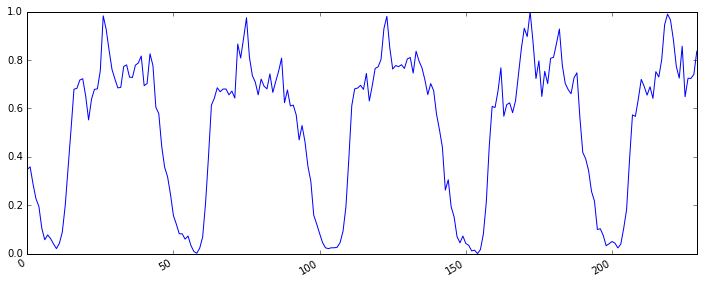

In [181]:
ts = data['data_hsdpa']
ts = (ts - ts.min()) / (ts.max() - ts.min())
ts.plot(use_index=False)

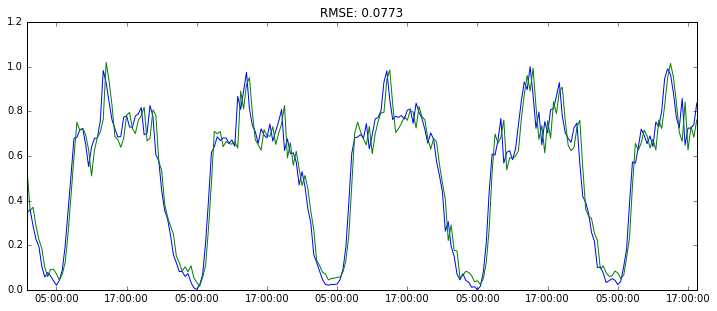

In [183]:
model = ARIMA(ts, order=(1, 0, 5))  
results_ARIMA = model.fit(disp=-1)  

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA = predictions_ARIMA_diff#np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))